In [12]:
from hmmsearch import parse_hmmersearch
import numpy as np
import pandas
from matplotlib import pyplot as plt
import seaborn
import numpy as np

In [3]:
domtbls = snakemake.input
"""domtbls = [
    'RNase_orn/orn_seed.tc.expresso_uniprot.tblout',
    'RNase_rnaset/rnaset_seed.tc.expresso_uniprot.tblout',
    'RNase_rnased/rnased_seed.tc.expresso_uniprot.tblout',
    'RNase_nrnc/nrnc_seed.tc.expresso_uniprot.tblout',
    'RNase_nrna/nrna_seed.tc.expresso_uniprot.tblout',
    'RNase_nrnb/nrnb_seed.tc.expresso_uniprot.tblout',
]"""

In [5]:
results = {}
domresults = {}
for tbl in domtbls:
    results[tbl.split('_')[1].split('/')[0]] = parse_hmmersearch(tbl)
    domresults[tbl.split('_')[1].split('/')[0]] = parse_hmmersearch(tbl.replace('tblout', 'domtblout'))

In [6]:
for rnase in results.keys():
    print('{}: {}'.format(rnase, len(set(results[rnase][results[rnase].seq_score>100].tname))))

orn: 15503
rnaset: 6197
rnased: 19493
nrnc: 5180
nrna: 23531
nrnb: 712


In [11]:
overlap = np.zeros((len(results),len(results)), dtype=np.int32)
for i,a in enumerate(results.keys()):
    for j,b in enumerate(results.keys()):
        if not a==b:
            overlap[i,j] = len(set(results[a][results[a].seq_score>125].tname).intersection(set(results[b][results[b].seq_score>100].tname)))
overlap = pandas.DataFrame(overlap, index=results.keys(), columns=results.keys())

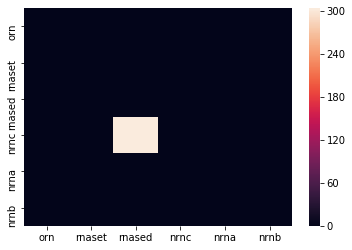

In [13]:
seaborn.heatmap(overlap)

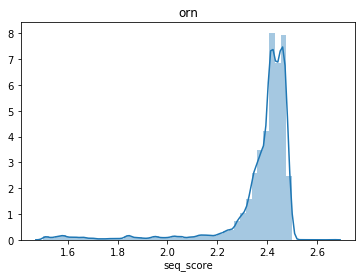

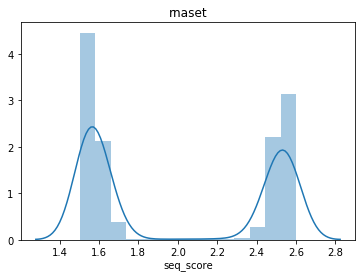

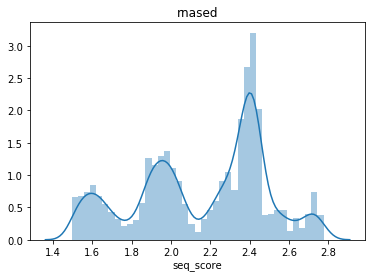

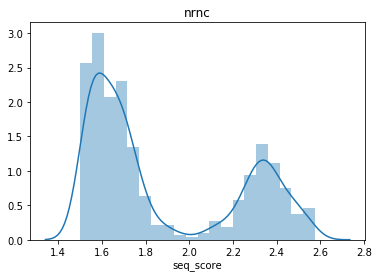

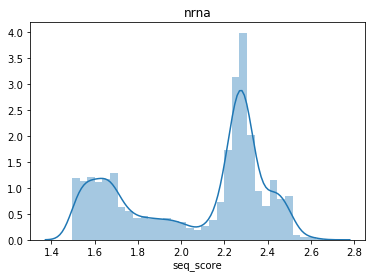

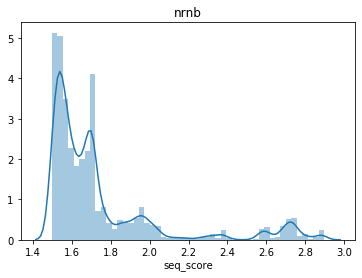

In [14]:
for rnase in results.keys():
    
    seaborn.distplot(np.log10(results[rnase].seq_score))
    plt.title(rnase)
    plt.show()

In [22]:
for rnase in results.keys():
    with open('RNase_{rnase}/{rnase}_search.id'.format(rnase=rnase), 'w') as o:
        tresults = domresults[rnase]
        tresults = tresults[tresults.seq_score>125]
        tresults = tresults[tresults.tlen>(tresults.qlen*0.8)]
        tresults = tresults[tresults.tlen<(tresults.qlen*1.2)]
        for r in set(tresults.tname):
            o.write('{}\n'.format(r))
